In [ ]:
# model_stacking(  과대적합의 문제가 있어서 잘 활용하지 않는다 ) 
#-->> cv 기반의 model stacking 을 많이 한다 

In [1]:
import pandas as pd
import numpy as np

In [2]:
rdf= pd.read_csv("team2.csv",encoding='utf-8',index_col=0)

In [3]:
Y=rdf.iloc[:,:1]
X=rdf.iloc[:,1:]

In [4]:
from sklearn.preprocessing import minmax_scale
minmax_X = minmax_scale(X)

In [5]:
minmax_Y = minmax_scale(Y)

In [6]:
rdf.iloc[:,1:]=minmax_X
rdf.iloc[:,:1]=minmax_Y

In [7]:
rdf.corr().iloc[:,0] 

출생아수            1.000000
졸업자수           -0.546187
사교육비            0.351348
인구             -0.806956
직장가입자          -0.589719
지역가입자          -0.530373
사회단체참여율        -0.307462
수출             -0.709129
수입             -0.653313
실질국내총생산(GDP)   -0.805866
1인당주거면적        -0.566131
고등교육이수율        -0.816703
원자료            -0.279709
e러닝시장규모        -0.766230
문화여가지출률        -0.694933
지니계수            0.567716
다문화출생아수        -0.416526
전국 이혼건수         0.428730
TV (%)          0.668100
라디오 (%)         0.617048
신문 (%)          0.682999
유소년부양비          0.776362
노년부양비          -0.839444
노령화지수          -0.807482
사망자수           -0.711671
실업률             0.314853
1인가구 비율        -0.776234
혼인건수(건)         0.727594
주택매매가격동향        0.133825
\t맞벌이가구비율      -0.716599
유치원수           -0.687933
어린이집수          -0.594952
Name: 출생아수, dtype: float64

In [8]:
del rdf['사교육비']
del rdf['사회단체참여율']
del rdf['원자료']
del rdf['다문화출생아수']
del rdf['전국 이혼건수 ']
del rdf['실업률']
del rdf['주택매매가격동향']


In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager,rc

font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import make_regression
import statsmodels.api as sm
import xgboost as xgb

In [13]:
X_train, X_test, y_train, y_test = train_test_split(rdf.iloc[:,1:],rdf.iloc[:,:1], random_state=0)

In [ ]:
#svr

In [ ]:
model = svm.SVR(gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
# 개별모델들

In [15]:
xg = xgb.XGBRegressor()
RF = RandomForestRegressor(n_estimators=100)
DT = DecisionTreeRegressor()

In [16]:
# 최종모델
svr = svm.SVR(gamma='scale')

In [18]:
xg.fit(X_train,y_train)
RF.fit(X_train,y_train)
DT.fit(X_train,y_train) 

[10:11:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ICT01_17\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [19]:
xg_pred=xg.predict(X_test)
RF_pred=RF.predict(X_test)
DT_pred=DT.predict(X_test)



In [21]:
new_data =np.array([xg_pred, RF_pred, DT_pred])

In [24]:
new_data=np.transpose(new_data)

In [27]:
new_data.shape

(5, 3)

In [29]:
svr.fit(new_data,y_test)
svr_pred=svr.predict(new_data)

C:\Users\ICT01_17\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.36247785, 0.644132  , 0.37055156, 0.1       , 0.26952383])

In [ ]:
# 최종모델 평가

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
print("MSE",mean_squared_error(y_test, svr_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,svr_pred)))
print(r2_score(y_test,svr_pred))


MSE 0.008077973340570609
RMSE 0.08987754636487696
0.8590242427256821


In [34]:

df1=pd.DataFrame({'y_data':y_test['출생아수'],'preds':svr_pred})
df1.corr()

,y_data,preds
y_data,1.000000,0.979524
preds,0.979524,1.000000


In [38]:
print(svr)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [45]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False) #입력값 X를 다항식으로 변환합니다. 
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([5.58932000e+05, 2.00400000e+05, 4.70081110e+07, 7.53912640e+07,
       2.75250250e+07, 4.48000000e+01, 1.72267511e+08, 1.60481015e+08,
       9.47394800e+05, 2.62000000e+01, 2.39000000e+01, 2.68000000e+01,
       1.07704100e+06, 4.16000000e+00, 4.18000000e-01, 1.34430000e+04,
       1.19455000e+05, 8.39000000e+01, 2.02000000e+01, 2.22000000e+01,
       2.94000000e+01, 1.01000000e+01, 3.43000000e+01, 2.48740000e+05,
       4.40000000e+00, 1.55000000e+01, 3.26104000e+05, 1.90000000e+00,
       4.23000000e+01, 1.92760000e+04, 8.49400000e+03, 3.12404981e+11,
       1.12009973e+11, 2.62743375e+13, 4.21385900e+13, 1.53846173e+13,
       2.50401536e+07, 9.62858245e+13, 8.96979747e+13, 5.29529270e+11,
       1.46440184e+07, 1.33584748e+07, 1.49793776e+07, 6.01992680e+11,
       2.32515712e+06, 2.33633576e+05, 7.51372288e+09, 6.67672221e+10,
       4.68943948e+07, 1.12904264e+07, 1.24082904e+07, 1.64326008e+07,
       5.64521320e+06, 1.91713676e+07, 1.39028746e+11, 2.45930080e+06,
      

C:\Users\ICT01_17\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ICT01_17\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ICT01_17\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


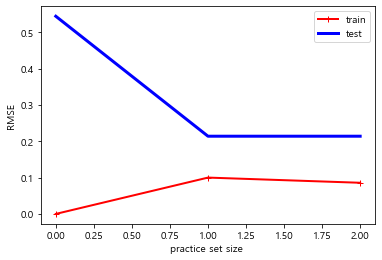

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, Y):
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], Y_train[:m])
        Y_train_predict = model.predict(X_train[:m])
        Y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(Y_train[:m], Y_train_predict))
        val_errors.append(mean_squared_error(Y_val, Y_val_predict))#이 함수는 말그대로 평균 제곱 오차 회귀 손실이다.
    plt.plot(np.sqrt(train_errors), "r+-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test")
    plt.legend(loc='upper right')
    plt.xlabel('practice set size ')
    plt.ylabel('RMSE')
    plt.show()

svr_reg = svm.SVR()
plot_learning_curves(svr_reg, new_data, svr_pred)